In [4]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
#import the data

data = pd.read_csv("data/train.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Column Descriptions:
---
- **Gender**: Gender of the passengers (Female, Male)

- **Customer Type**: The customer type (Loyal customer, disloyal customer)

- **Age**: The actual age of the passengers

- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

- **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

- **Flight distance**: The flight distance of this journey

- **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

- **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

- **Ease of Online booking**: Satisfaction level of online booking

- **Gate location**: Satisfaction level of Gate location

- **Food and drink**: Satisfaction level of Food and drink

- **Online boarding**: Satisfaction level of online boarding

- **Seat comfort**: Satisfaction level of Seat comfort

- **Inflight entertainment**: Satisfaction level of inflight entertainment

- **On-board service**: Satisfaction level of On-board service

- **Leg room service**: Satisfaction level of Leg room service

- **Baggage handling**: Satisfaction level of baggage handling

- **Check-in service**: Satisfaction level of Check-in service

- **Inflight service**: Satisfaction level of inflight service

- **Cleanliness**: Satisfaction level of Cleanliness

- **Departure Delay in Minutes**: Minutes delayed when departure

- **Arrival Delay in Minutes**: Minutes delayed when Arrival

- **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Data Cleaning
---
- 

### Drop Columns: Unnamed, id

- Unnamed and id are not necessary for our analysis. Therefore, I will remove them from the dataset. 

In [7]:
data = data.drop(['Unnamed: 0', 'id'], axis=1)
data.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied


### Rename Columns

- Next I will rename the columns to follow the conventional python developer format. 
    - lowercase and snake case.  

In [8]:
# Function to convert strings to snake case 
def snake_case(string):
    return string.lower().replace(' ', '_')

#rename columsn to lower case using snake case
for column in data.columns:
    data = data.rename(columns={column: snake_case(column)})

In [10]:
#Call info() method to check columns names, dtypes, and number of records 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103904 non-null  object 
 1   customer_type                      103904 non-null  object 
 2   age                                103904 non-null  int64  
 3   type_of_travel                     103904 non-null  object 
 4   class                              103904 non-null  object 
 5   flight_distance                    103904 non-null  int64  
 6   inflight_wifi_service              103904 non-null  int64  
 7   departure/arrival_time_convenient  103904 non-null  int64  
 8   ease_of_online_booking             103904 non-null  int64  
 9   gate_location                      103904 non-null  int64  
 10  food_and_drink                     103904 non-null  int64  
 11  online_boarding                    1039

### Check For Missing Values

In [11]:
data.isna().sum()

gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure/arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             310
satisfaction                           0
dtype: int64

- It appears that we have **310** NaN values from the arrival_delay_in_minutes column. 
- 310 is not enough missing values to effect my analysis of the data. 
- The next step I will delete the 310 records with missing data. 

In [13]:
missing_arrival_delay = data[data['arrival_delay_in_minutes'].isna()]
missing_arrival_delay.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied


#### Drop Records With Missing Data

In [14]:
data.dropna(axis=0, inplace=True)

In [18]:
# Check to see if missing data records have been removed. 
data.isna().sum()

gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

## EDA: Exploratory Data Analysis

- I will first explore the categorical columns, to check their distributions.
- Then I will label encode them to convert them to a numerical data type for modeling. 

In [33]:
# show the dtypes of the DataFrame
print(data.dtypes)

gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
inflight_wifi_service                  int64
departure/arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
on-board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
satisfacti

- There is a total of **5** categorical columns in the dataset that I will explore. 

### Satisfaction

- The image below shows the distribution of surveys completed with being labeled as satisfied or dissatisfied. 
- It appears more people were willing to complete the survey because they were dissatisfied with their travel experience. 

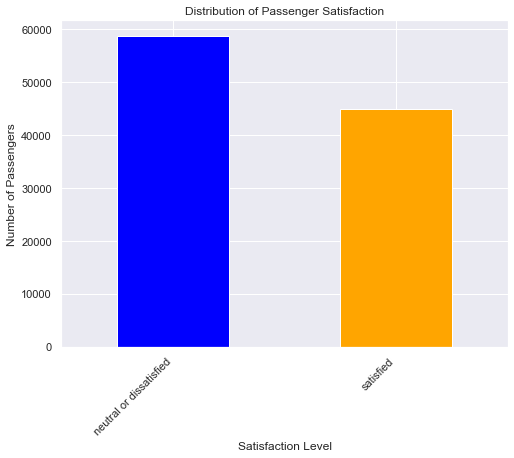

In [66]:
# Count the number of occurances of each value in the satisfaction column 
satisfaction_counts = data['satisfaction'].value_counts()

# Create a bar chart visualization of satisfaction_counts
fig, ax = plt.subplots(figsize=(8, 6))

ax = satisfaction_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Passenger Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Passengers')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

### Gender

- Below I used a stacked bar chart to visualize the gender distribution and compared satisfaction levels between male and female passengers. 
- The distribution between male and female passengers in the dataset are nearly even. 

In [36]:
gender_satisfaction = data[['gender', 'satisfaction']]

gender_satisfaction_counts = gender_satisfaction.groupby(['gender', 'satisfaction']).size().unstack()

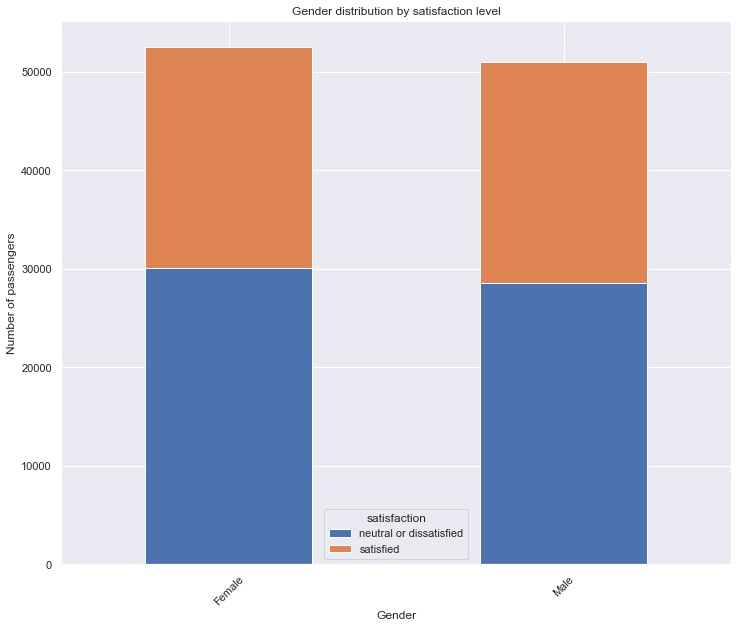

In [70]:
# create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 10)) # adjust the figsize as needed
gender_satisfaction_counts.plot(kind='bar', stacked=True, ax=ax)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0], labels[1] = [label.replace('_', ' ').title() for label in labels[0:2]]
ax.set_xticklabels(labels, rotation=45)
plt.xlabel('Gender')
plt.ylabel('Number of passengers')
plt.title('Gender distribution by satisfaction level')
plt.show()

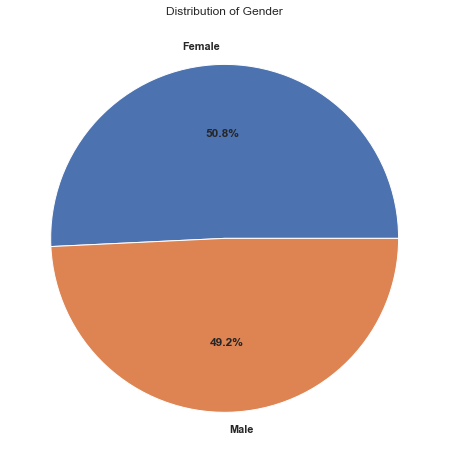

In [52]:
# Calculate the percentage of each category
counts = data['gender'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', textprops={'fontweight':'bold'})
plt.title('Distribution of Gender')
plt.show()

- There appears to be nearly a perfect distribution of surveys completed by men and women. 

### Customer Type

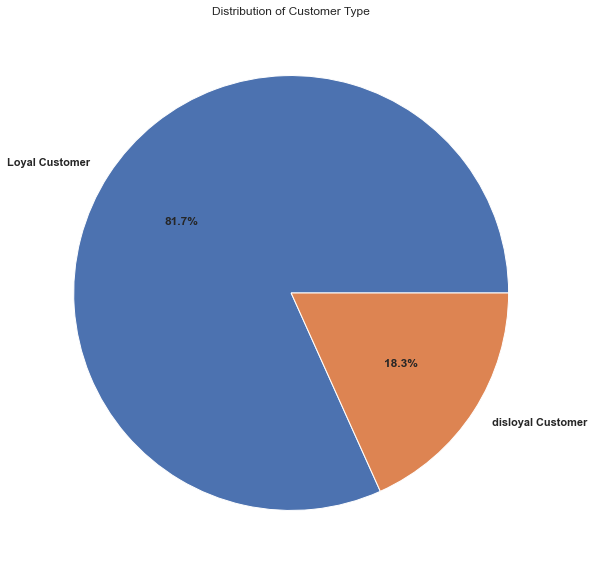

In [35]:
# Calculate the percentage of each category
counts = data['customer_type'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(10,10))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', textprops={'fontweight':'bold'})
plt.title('Distribution of Customer Type')
plt.show()

I 

In [19]:
data.type_of_travel.unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [21]:
data['class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

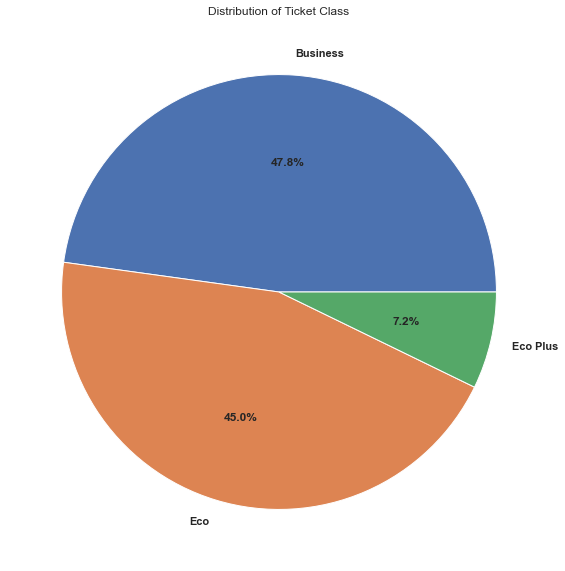

In [28]:
# Calculate the percentage of each category
counts = data['class'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(10,10))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', textprops={'fontweight':'bold'})
plt.title('Distribution of Ticket Class')
plt.show()